# Лабораторная работа №2

Используем тот же самый датасет, который мы использовали в предыдущей работе.

### Добавляем новый атрибут.

Атрибуты:

Price Change, который вычислит изменение цены акций за день. Это можно сделать, вычитая цену открытия из цены закрытия: Price Change = Close - Open

Average Price, который рассчитает среднюю цену акций за день. Это можно сделать следующим образом: (Open + High + Low + Close) / 4

Close Higher Than Open. Атрибут показывает, для каких дней цена закрытия была выше цены открытия, выполняется так: Close > Open.
Результатом этого сравнения будет логическое значение (True или False): Если цена закрытия больше цены открытия для данной строки, результат будет True. Если цена закрытия меньше или равна цене открытия, результат будет False.

Считываем наш датасет.

In [88]:
import pandas as pd
from IPython.display import display, HTML
from scipy import stats
import matplotlib.pyplot as plt


data = pd.read_csv("v2.csv")

Добавляем новый атрибут и выводим обновленный DataFrame.

In [248]:
data = pd.read_csv("v2.csv")

df = pd.DataFrame(data)

df['Price_Change'] = df['Close'] - df['Open']
df['Average_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df['Close_Higher_Than_Open'] = df['Close'] > df['Open']

display(HTML(df.head(10).to_html(index=False))) 


Date,Open,High,Low,Close,Volume,Price_Change,Average_Price,Close_Higher_Than_Open
2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000,-0.004084,0.195042,False
2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000,0.003333,0.196813,True
2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000,0.008667,0.202792,True
2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000,0.004167,0.206312,True
2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000,-0.001833,0.209916,False
2004-01-09,0.207833,0.214833,0.206167,0.212250,766584000,0.004417,0.210271,True
2004-01-12,0.213000,0.215333,0.211000,0.214667,541980000,0.001667,0.213500,True
2004-01-13,0.213583,0.215667,0.201333,0.203583,865800000,-0.010000,0.208541,False
2004-01-14,0.204583,0.207500,0.200167,0.202083,544872000,-0.002500,0.203583,False
2004-01-15,0.200583,0.204083,0.197000,0.202417,609204000,0.001834,0.201021,True


### "Причешем" датасет.

Загружаем данные, смотрим первые строки датасета, удаляем дубликаты и обрабатываем пропущенные значения.

In [134]:
data = pd.read_csv("v2.csv")

display(data.head())

data = data.drop_duplicates()
print("Количество строк после удаления дубликатов:", len(data))

print(data.isnull().sum())


,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


Количество строк после удаления дубликатов: 5033
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


Удаляем выбросы, используем IQR для определения выбросов для числовых столбцов.

In [118]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("Количество строк после удаления выбросов:", len(data))


Количество строк после удаления выбросов: 2854


Ищем аномальные данные, используем Z-score для поиска аномалий (Z-score < 1.5).

In [130]:
from scipy import stats

z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 1.5).all(axis=1)
data = data[filtered_entries]

print("Количество строк после удаления аномальных данных:", len(data))



Количество строк после удаления аномальных данных: 2210


Проверяем на кривые данные по типам данных.

In [124]:
print(data.dtypes)


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


Сохраняем и выводим очищенный датасет.

In [126]:
data.to_csv("cleaned_v2.csv", index=False)

display(data.head())

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


### Построим графики зависимости одной переменной от другой.

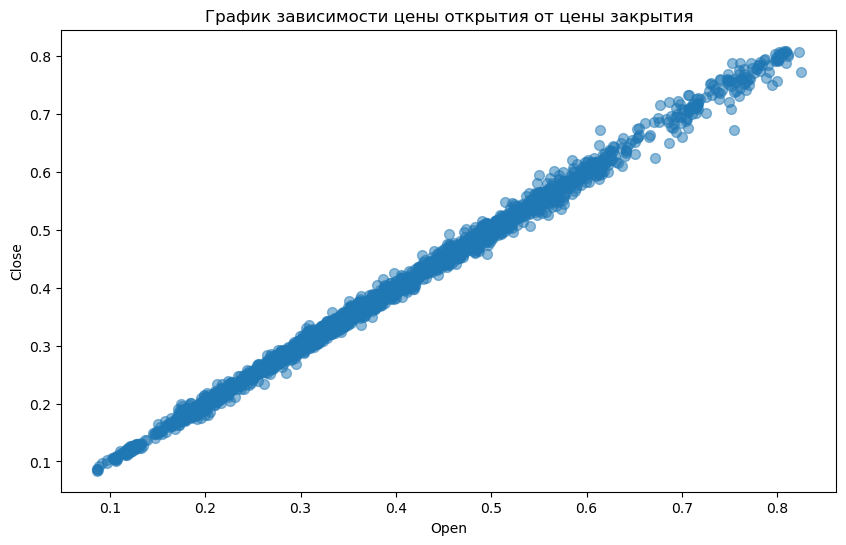

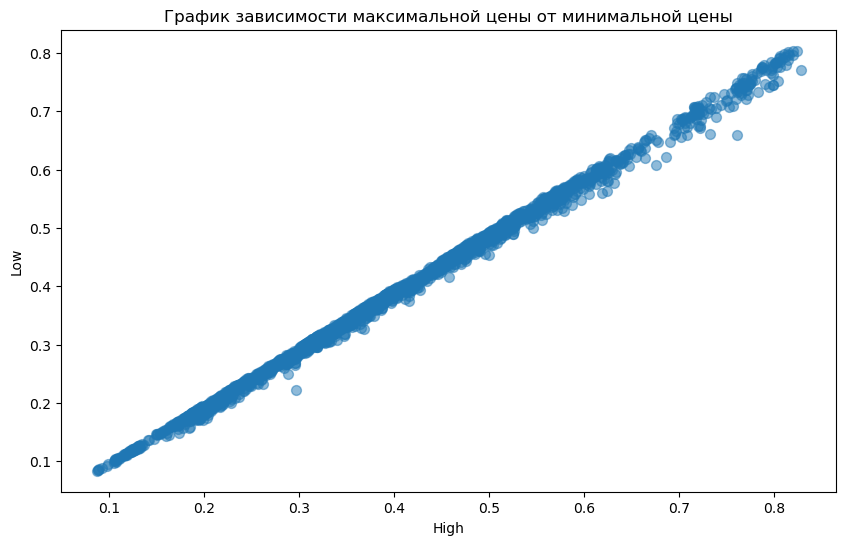

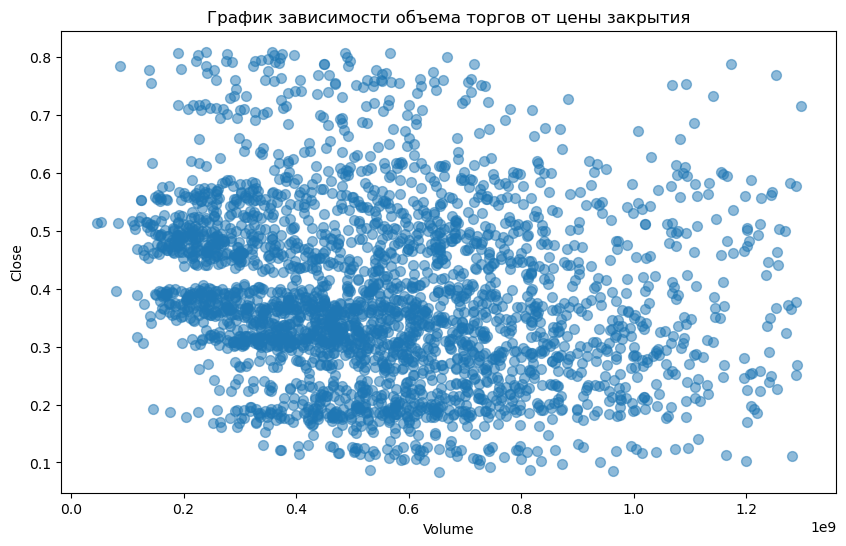

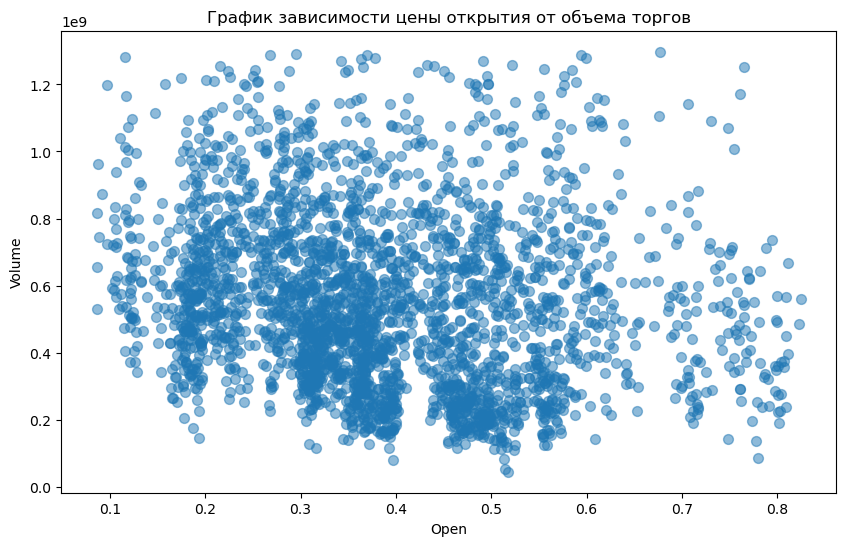

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cleaned_v2.csv")

plt.figure(figsize=(10, 6))
plt.scatter(data["Open"], data["Close"], s=50, alpha=0.5) 
plt.xlabel("Open")
plt.ylabel("Close")
plt.title("График зависимости цены открытия от цены закрытия")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data["High"], data["Low"], s=50, alpha=0.5)
plt.xlabel("High")
plt.ylabel("Low")
plt.title("График зависимости максимальной цены от минимальной цены")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data["Volume"], data["Close"], s=50, alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Close")
plt.title("График зависимости объема торгов от цены закрытия")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data["Open"], data["Volume"], s=50, alpha=0.5)
plt.xlabel("Open")
plt.ylabel("Volume")
plt.title("График зависимости цены открытия от объема торгов")
plt.show()


График зависимости цены открытия от цены закрытия:
Все точки расположены вдоль прямой линии, которая идет от нижнего левого угла к верхнему правому углу. 
Цена открытия и цена закрытия сильно коррелируют, что подтверждает, что при высоких ценах открытия, и закрытие чаще всего происходит по более высокой цене.

График зависимости максимальной цены от минимальной цены:
Точки также расположены вдоль прямой линии от нижнего левого угла к верхнему правому углу.
Максимальная цена и минимальная цена сильно коррелируют, цены на акции не сильно колеблются в течение дня.

График зависимости объема торгов от цены закрытия:
Все точки расположены в рассеянном виде, не образуя четко выраженные кластеры.
Объем торгов не сильно зависит от цены закрытия. Это может говорить о том, что в большинстве случаев торги не активны и цена закрытия не сильно влияет на объем торгов.

График зависимости цены открытия от объема торгов:
Точки также расположены в рассеянном виде.
Цена открытия не сильно зависит от объема торгов, объем торгов не сильно влияет на цену открытия акции.

### Применяем метод KMeans к нашему датасету.

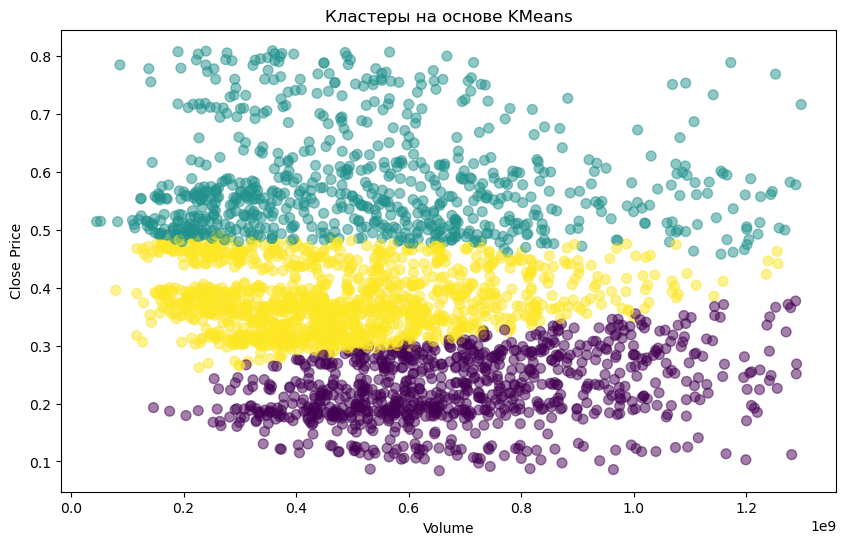

In [325]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("cleaned_v2.csv")

data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], c=data['Cluster'], s=50, alpha=0.5, cmap='viridis')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Кластеры на основе KMeans')
plt.show()



График показывает кластеры, сформированные с помощью алгоритма KMeans на основе данных о цене закрытия и объеме. 

Кластер 1 (фиолетовый): Точки этого кластера имеют низкую цену закрытия и средний объем. 
Кластер 2 (желтый): Точки этого кластера имеют среднюю цену закрытия и средний объем.
Кластер 3 (бирюзовый): Точки этого кластера имеют высокую цену закрытия и большой объем.

Из визуализации можно сделать вывод, что кластеры могут быть связаны с различными типами торговой активности или с различными этапами движения цены актива.

### Вывод

Проведенная обработка данных, включающая удаление дубликатов, обработку пропущенных значений, удаление выбросов, поиск аномальных данных и проверку на кривые данные.
Визуализация зависимостей позволила выявить следующие закономерности:
Цена открытия и цена закрытия: График демонстрирует сильную положительную корреляцию, что логично, так как цена открытия является отправной точкой для торгов в течение дня, а цена закрытия – результатом этих торгов.
Максимальная и минимальная цена: Также наблюдается положительная корреляция, что говорит о том, что чем выше максимальная цена, тем выше и минимальная.
Объем торгов и цена закрытия: Взаимосвязь не столь однозначна. Возможно, на графике видны периоды высокой активности торгов, когда цена актива растет, и периоды низкой активности с более стабильной ценой.
Цена открытия и объем торгов: Наблюдается слабая зависимость между этими двумя показателями, что предполагает, что цена открытия не является определяющим фактором для объема торгов в течение дня. 
Кластеризация KMeans по цене закрытия и объему позволила разделить данные на три группы:
Кластер 1 (фиолетовый): Характеризуется низкой ценой закрытия и средним объемом. Такое сочетание может быть связано с периодами низкой активности на рынке, когда цена актива стабилизируется на относительно низком уровне.
Кластер 2 (желтый): Отличается средней ценой закрытия и средним объемом. Данный кластер может отражать периоды средней активности, когда цена актива колеблется в определенном диапазоне, не демонстрируя резких изменений.
Кластер 3 (бирюзовый): Отличается высокой ценой закрытия и большим объемом. Такая комбинация говорит о повышенной активности на рынке, возможно, связанной с ростом цены актива или с сильными эмоциями трейдеров.